## How has the student to teacher ratio changed in Queensland vs NSW and Victorian high schools since 2006, and is it impacted by the affiliation of the school i.e. government, non-government, Catholic or independent schools?

I investigated this issue using the Australian Bureau of Statistics Schools data, available [here](https://www.abs.gov.au/statistics/people/education/schools/latest-release#data-download), focusing on comparing only full-time equivalent student and teacher numbers in Queensland, NSW and Victorian high schools only.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [150]:
s_t_ratio = pd.read_excel("Table 53a Student (FTE) to Teaching Staff (FTE) Ratios, 2006-2021.xlsx", sheet_name= "Table 1", skiprows = 4)
s_t_ratio.head()

,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
0,2021,a NSW,a Government,a Primary School,15.2
1,2021,a NSW,a Government,b Secondary School,13.2
2,2021,a NSW,a Government,c All Levels,14.3
3,2021,a NSW,b Non-Government,a Primary School,15.0
4,2021,a NSW,b Non-Government,b Secondary School,11.1


Having successfully read in the excel file, it is now necessary to have a look at how the data is being represented and if there are any issues/formatting inconsistencies that may influence the analysis.

In [151]:
print(s_t_ratio['School Level'].unique())
print(s_t_ratio['State/Territory'].unique())
print(s_t_ratio['Year'].unique())

['a Primary School' 'b Secondary School' 'c All Levels' 'a Primary school'
 'b Secondary school' nan]
['a NSW' 'b Vic.' 'c Qld' 'd SA' 'e WA' 'f Tas.' 'g NT' 'h ACT' 'i Aust.'
 nan]
[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 nan 'Table Notes'
 '(a) In 2020, Year 7 became the first year of secondary schooling for three Government schools in South Australia.'
 '(b) Victorian Government teaching staff FTE has been revised for 2019 data.'
 '(c) From 2018, the New South Wales (NSW) Government implemented a new payroll system that has resulted in an improved methodology in their teacher reporting. Care should be taken when comparing NSW Government in-school staff numbers with previous years.'
 '(d) In 2019, the structure of schooling for a number of non-government schools in South Australia changed, with Year 7 becoming the first year of secondary schooling, whereas previously it was Year 8.'
 '(e) In 2015, the structure of schooling in Queensland and W

Our analysis will only focus on High schools (secondary schools) comparing Queensland to NSW and Victoria. As we can see that the nomenclature of the different school levels differs based on whether "school" is capitalised or not, we will need to select both versions. There are also data that do not have either school level or state listed, so these will also need to be excluded. It's also important to see there is a note about the change in how Queensland defined secondary schooling ages in 2015, including year 7 for the first time. We would need to be mindful of them when comparing to NSW and Victorian schools.

In [152]:
# Select only High Schools in NSW, Vic and Qld
secondary = ['b Secondary School', 'b Secondary school']
state = ['a NSW', 'b Vic.', 'c Qld']
affiliation = ['a Government', 'b Non-Government', 'c Catholic', 'd Independent']
s_t_ratio = s_t_ratio[s_t_ratio['School Level'].isin(secondary)]
s_t_ratio = s_t_ratio[s_t_ratio['State/Territory'].isin(state)]
s_t_ratio = s_t_ratio[s_t_ratio['Affiliation'].isin(affiliation)]
s_t_ratio.head()

,Year,State/Territory,Affiliation,School Level,Student to Teaching Staff Ratio
1,2021,a NSW,a Government,b Secondary School,13.2
4,2021,a NSW,b Non-Government,b Secondary School,11.1
7,2021,a NSW,c Catholic,b Secondary School,12.1
10,2021,a NSW,d Independent,b Secondary School,10.0
16,2021,b Vic.,a Government,b Secondary School,11.8


In [153]:
print(s_t_ratio['School Level'].value_counts())
print(s_t_ratio['State/Territory'].value_counts())
s_t_ratio.info()

b Secondary School    144
b Secondary school     48
Name: School Level, dtype: int64
a NSW     64
b Vic.    64
c Qld     64
Name: State/Territory, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 1 to 2065
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             192 non-null    object 
 1   State/Territory                  192 non-null    object 
 2   Affiliation                      192 non-null    object 
 3   School Level                     192 non-null    object 
 4   Student to Teaching Staff Ratio  192 non-null    float64
dtypes: float64(1), object(4)
memory usage: 9.0+ KB


In order to create a line plot showing how student to teacher ratios have changed over time by State, we need separate dataframes for each.

In [154]:
nsw = s_t_ratio[s_t_ratio['State/Territory'] == 'a NSW']
vic = s_t_ratio[s_t_ratio['State/Territory'] == 'b Vic.']
qld = s_t_ratio[s_t_ratio['State/Territory'] == 'c Qld']

In order to see how the student to teacher ratios change with school affiliation in Queensland, we need to plot a line chart showing these affiliations separately. I have chosen to Pyplot in Matplotlib to iterate over the affiliations to create separate lines within the one plot. I have also set a standard colour palette for each affiliation that will be replicated when we compare across states.

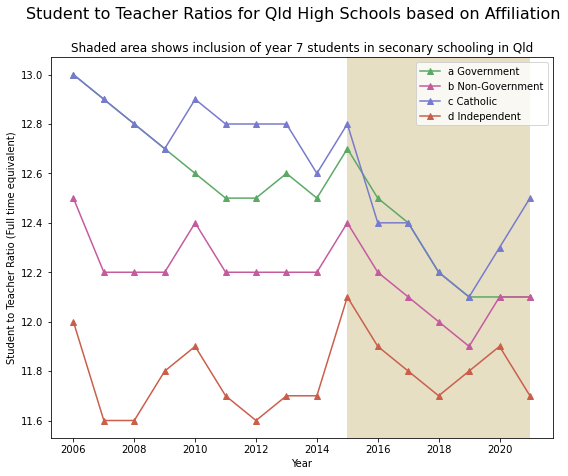

In [165]:
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot()
marker = ["#5ba965", "#c55a9f", "#777acd", "#ca5e4a"]
for (a,b) in zip(affiliation, marker):
    temp = qld[qld['Affiliation']== a]
    ax.plot(temp['Year'], temp['Student to Teaching Staff Ratio'], color= b, marker="^", label=a)
ax.set(
title="Shaded area shows inclusion of year 7 students in seconary schooling in Qld",
xlabel="Year",
ylabel="Student to Teacher Ratio (Full time equivalent)")
a = 2015
b = 2021
plt.axvspan(a,b, color='#ad963d', alpha=0.3, lw=0)
plt.suptitle("Student to Teacher Ratios for Qld High Schools based on Affiliation", fontsize=16)
plt.legend()
plt.show()

This plot shows us that in Queensland, independent schools have the lowest student to teacher ratios, indicating that each child receives more teacher attention, an indication of a better learning experience. Meanwhile, Government and Catholic schools have a similar student to teacher ratio, which may indicate the learning experience is similar in both school types. There is also a sharp uptick in student to teacher ratios in 2015, likely when year 7 students were included in secondary schooling in Queensland.
The following figure will allow us to compare how the Queensland student to teacher ratios differ in comparison to NSW and Victoria, based on the schools' affiliation. 

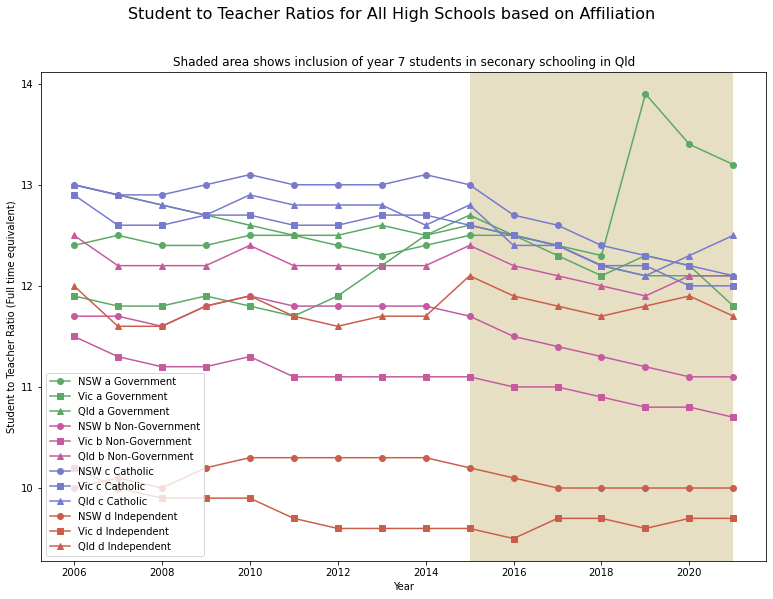

In [163]:
fig = plt.figure(figsize=[13,9])
ax = fig.add_subplot()
marker = ["#5ba965", "#c55a9f", "#777acd", "#ca5e4a"]
for (a,b) in zip(affiliation, marker):
    nsw_temp = nsw[nsw['Affiliation']== a]
    ax.plot(nsw_temp['Year'], nsw_temp['Student to Teaching Staff Ratio'], color=b, marker="o", label="NSW "+ a)
    vic_temp = vic[vic['Affiliation']== a]
    ax.plot(vic_temp['Year'], vic_temp['Student to Teaching Staff Ratio'], color=b, marker="s", label="Vic "+ a)
    qld_temp = qld[qld['Affiliation']== a]
    ax.plot(qld_temp['Year'], qld_temp['Student to Teaching Staff Ratio'], color=b, marker="^", label="Qld "+ a)
ax.set(title="Shaded area shows inclusion of year 7 students in seconary schooling in Qld", 
xlabel="Year",
ylabel="Student to Teacher Ratio (Full time equivalent)")
a = 2015
b = 2021
plt.axvspan(a,b, color='#ad963d', alpha=0.3, lw=0)
plt.suptitle("Student to Teacher Ratios for All High Schools based on Affiliation", fontsize=16)
plt.legend()
plt.show()

When comparing similarly affiliated schools between Queensland, NSW and Victoria, it is evident that Catholic schools in general have the highest student to teacher ratios; however, this is closely followed by Government schools for NSW and Victoria and non-Government schools for Queensland. Meanwhile, the independent schools tend to have the lowest the lowest student to teacher ratios between all states; however, Queensland independent school's values are much higher, being larger than those of Victorian non-government schools. Further investigation is required to determine why these differences in student to teacher ratios in Queensland schools are so stark compared to NSW and Victoria; however, as we do not have details on how many schools are included in each category, it is difficult to comment further. It is also worth noting the sudden increase in student to teacher ratios in NSW Government schools in 2019. According to the [Australian Curriculum, Assessment and Reporting Authority](https://www.acara.edu.au/reporting/national-report-on-schooling-in-australia/national-report-on-schooling-in-australia-data-portal/student-teacher-ratios#notes), a change in the payroll system changed how casual and temporary teachers were counted, causing a fall in full time equivalent teacher numbers, which likely explains why the ratio increased.   